<a href="https://www.kaggle.com/code/diaaessam/titanic-problem?scriptVersionId=124083981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Importing the Datasets

In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
train_data.shape

(891, 12)

In [3]:
test_data_org=test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
print(test_data.head())
test_data.shape

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


(418, 11)

# percentage of Women and Men

In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Describing Data

In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [8]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


# Relations between dependent variable and independent variables

In [10]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Males and Females who survived'}, xlabel='Sex', ylabel='Survived'>

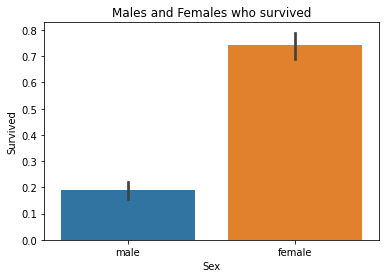

In [11]:
plt.title("Males and Females who survived")
sns.barplot(x=train_data['Sex'],
             y=train_data['Survived'])

<AxesSubplot:title={'center':'Age of people who survived or did not survive'}, xlabel='Survived', ylabel='Age'>

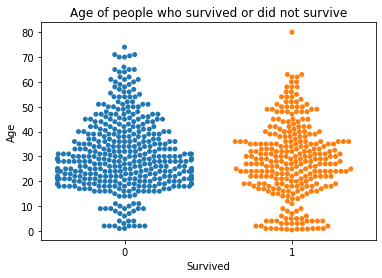

In [12]:
plt.title("Age of people who survived or did not survive")
sns.swarmplot(x=train_data['Survived'], y=train_data['Age'])

<AxesSubplot:title={'center':"People's Fair who survived or did not survive"}, xlabel='Survived', ylabel='Fare'>

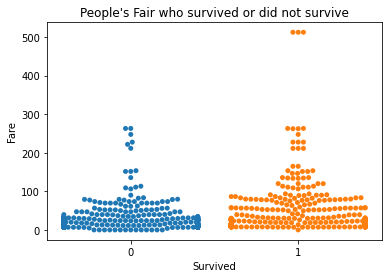

In [13]:
plt.title("People's Fair who survived or did not survive")
sns.swarmplot(x=train_data['Survived'], y=train_data['Fare'])

<AxesSubplot:title={'center':'Survived and not survived people with their Fare and Age'}, xlabel='Age', ylabel='Fare'>

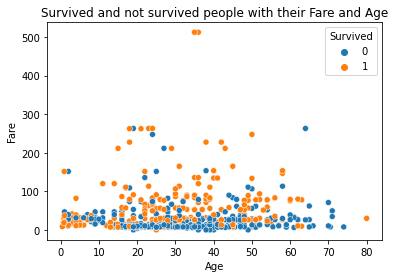

In [14]:
plt.title("Survived and not survived people with their Fare and Age")
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'], hue=train_data['Survived'])

In [15]:
train_data.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


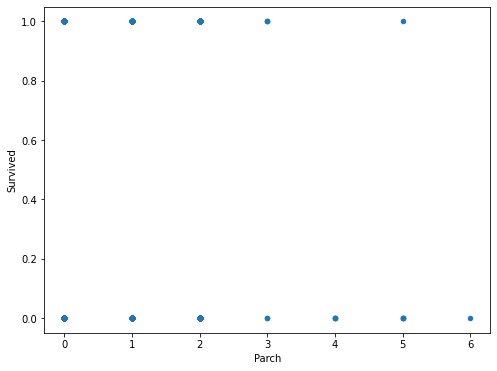

In [16]:
train_data.plot(kind = 'scatter',
  x = 'Parch',
  y = 'Survived',
  figsize=(8,6))
plt.show()

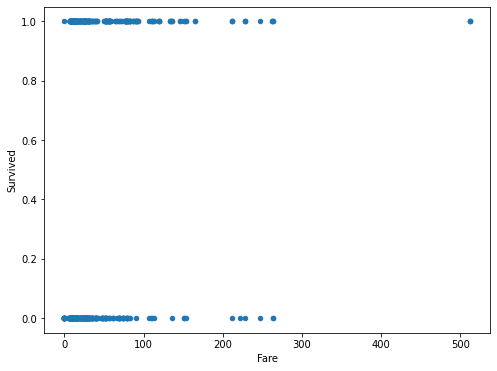

In [17]:
train_data.plot(kind = 'scatter',
  x = 'Fare',
  y = 'Survived',
  figsize=(8,6))
plt.show()

# Taking Ground Truth from Train Data

In [18]:
y=train_data['Survived'].values
y.shape

(891,)

# Merging Train Data and Test Data

In [19]:
train_data=train_data.drop(['Survived'], axis=1)
concated_data=pd.concat([train_data,test_data],ignore_index=True)
print(concated_data)

      PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
...           ...     ...                                                ...   
1304         1305       3                                 Spector, Mr. Woolf   
1305         1306       1                       Oliva y Ocana, Dona. Fermina   
1306         1307       3                       Saether, Mr. Simon Sivertsen   
1307         1308       3                                Ware, Mr. Frederick   
1308         1309       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch       

# Feature Engineering

In [20]:
concated_data['Relatives'] = concated_data['SibSp'] + concated_data['Parch']
concated_data.loc[concated_data['Relatives'] > 0, 'Alone'] = 0
concated_data.loc[concated_data['Relatives'] == 0, 'Alone'] = 1

# Checking Nan values

In [21]:
#Thanks to this notebook (https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial)
for col in concated_data.columns.tolist():          
    print('{} column missing values: {}'.format(col, concated_data[col].isnull().sum()))

PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 263
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 1014
Embarked column missing values: 2
Relatives column missing values: 0
Alone column missing values: 0


In [22]:
# Thanks to this notebook (https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial)
concated_data[concated_data['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,1.0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,1.0


# Now fix these values:

In [23]:
concated_data['Embarked'] = concated_data['Embarked'].fillna('S')
print("row 61: ",concated_data.iloc[61,10])
print("row 829: ",concated_data.iloc[829,10])

row 61:  S
row 829:  S


# Feature Selection

In [24]:
X=concated_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Relatives']].values
print(X[0:5,:])

[[3 'male' 22.0 1 0 7.25 'S' 1]
 [1 'female' 38.0 1 0 71.2833 'C' 1]
 [3 'female' 26.0 0 0 7.925 'S' 0]
 [1 'female' 35.0 1 0 53.1 'S' 1]
 [3 'male' 35.0 0 0 8.05 'S' 0]]


# Taking care of missing data

In [25]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:,2].reshape(-1,1))
X[:,2]=(imputer.transform(X[:,2].reshape(-1,1))).reshape(-1,)

imputer.fit(X[:,5].reshape(-1,1))
X[:,5]=(imputer.transform(X[:,5].reshape(-1,1))).reshape(-1,)

print(X[:6])

[[3 'male' 22.0 1 0 7.25 'S' 1]
 [1 'female' 38.0 1 0 71.2833 'C' 1]
 [3 'female' 26.0 0 0 7.925 'S' 0]
 [1 'female' 35.0 1 0 53.1 'S' 1]
 [3 'male' 35.0 0 0 8.05 'S' 0]
 [3 'male' 29.881137667304014 0 0 8.4583 'Q' 0]]


# Encoding Categorical Data

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

print(X[:6,:])

[[0.0 0.0 1.0 3 'male' 22.0 1 0 7.25 1]
 [1.0 0.0 0.0 1 'female' 38.0 1 0 71.2833 1]
 [0.0 0.0 1.0 3 'female' 26.0 0 0 7.925 0]
 [0.0 0.0 1.0 1 'female' 35.0 1 0 53.1 1]
 [0.0 0.0 1.0 3 'male' 35.0 0 0 8.05 0]
 [0.0 1.0 0.0 3 'male' 29.881137667304014 0 0 8.4583 0]]


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,4]=le.fit_transform(X[:,4])
print(X[:6,:])
print("")

[[0.0 0.0 1.0 3 1 22.0 1 0 7.25 1]
 [1.0 0.0 0.0 1 0 38.0 1 0 71.2833 1]
 [0.0 0.0 1.0 3 0 26.0 0 0 7.925 0]
 [0.0 0.0 1.0 1 0 35.0 1 0 53.1 1]
 [0.0 0.0 1.0 3 1 35.0 0 0 8.05 0]
 [0.0 1.0 0.0 3 1 29.881137667304014 0 0 8.4583 0]]



# Getting back Train data and Test data

In [28]:
test_data=X[891:]
X=X[:891]
print(X.shape,test_data.shape)

(891, 10) (418, 10)


In [29]:
print(test_data[:6])

[[0.0 1.0 0.0 3 1 34.5 0 0 7.8292 0]
 [0.0 0.0 1.0 3 0 47.0 1 0 7.0 1]
 [0.0 1.0 0.0 2 1 62.0 0 0 9.6875 0]
 [0.0 0.0 1.0 3 1 27.0 0 0 8.6625 0]
 [0.0 0.0 1.0 3 0 22.0 1 1 12.2875 2]
 [0.0 0.0 1.0 3 1 14.0 0 0 9.225 0]]


# Splitting the Data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [31]:
print(x_train[:6])

[[0.0 0.0 1.0 1 1 42.0 1 0 52.0 1]
 [0.0 1.0 0.0 3 1 29.881137667304014 1 0 15.5 1]
 [1.0 0.0 0.0 1 1 49.0 1 0 89.1042 1]
 [1.0 0.0 0.0 1 0 19.0 1 0 91.0792 1]
 [0.0 0.0 1.0 1 1 19.0 1 0 53.1 1]
 [0.0 0.0 1.0 2 0 27.0 1 0 21.0 1]]


In [32]:
print(x_test[:6])

[[0.0 0.0 1.0 1 0 48.0 0 0 25.9292 0]
 [0.0 0.0 1.0 3 1 29.881137667304014 0 0 7.8958 0]
 [0.0 0.0 1.0 2 0 17.0 0 0 10.5 0]
 [0.0 1.0 0.0 3 0 29.881137667304014 0 0 8.1375 0]
 [0.0 0.0 1.0 2 0 7.0 0 2 26.25 2]
 [0.0 0.0 1.0 3 1 21.0 0 0 7.8542 0]]


In [33]:
print(y_train[:6])

[0 0 1 1 0 0]


In [34]:
print(y_test[:6])

[1 0 1 0 1 0]


In [35]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(668, 10) (223, 10) (668,) (223,)


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,3:]=sc.fit_transform(x_train[:,3:])
x_test[:,3:]=sc.transform(x_test[:,3:])
test_data[:,3:]=sc.transform(test_data[:,3:])

In [37]:
print(x_train[:6])

[[0.0 0.0 1.0 -1.5932633446827085 0.7318689663512504 0.9040165883511864
  0.49236868939066036 -0.4868644955601508 0.44426438339827423
  0.07784755093219665]
 [0.0 1.0 0.0 0.8173819877024538 0.7318689663512504 -0.011651581396073035
  0.49236868939066036 -0.4868644955601508 -0.3495136383493248
  0.07784755093219665]
 [1.0 0.0 0.0 -1.5932633446827085 0.7318689663512504 1.4329174878141566
  0.49236868939066036 -0.4868644955601508 1.2511821498236788
  0.07784755093219665]
 [1.0 0.0 0.0 -1.5932633446827085 -1.3663648084240088 -0.8338006527414299
  0.49236868939066036 -0.4868644955601508 1.2941331523702955
  0.07784755093219665]
 [0.0 0.0 1.0 -1.5932633446827085 0.7318689663512504 -0.8338006527414299
  0.49236868939066036 -0.4868644955601508 0.46818646076601017
  0.07784755093219665]
 [0.0 0.0 1.0 -0.3879406784901273 -1.3663648084240088
  -0.22934248192660683 0.49236868939066036 -0.4868644955601508
  -0.2299032515106455 0.07784755093219665]]


In [38]:
print(x_test[:6])

[[0.0 0.0 1.0 -1.5932633446827085 -1.3663648084240088 1.3573602164623038
  -0.48942917482713405 -0.4868644955601508 -0.12270624809151491
  -0.5804076898615677]
 [0.0 0.0 1.0 0.8173819877024538 0.7318689663512504 -0.011651581396073035
  -0.48942917482713405 -0.4868644955601508 -0.5148847844581766
  -0.5804076898615677]
 [0.0 0.0 1.0 -0.3879406784901273 -1.3663648084240088 -0.9849151954451356
  -0.48942917482713405 -0.4868644955601508 -0.4582503536572151
  -0.5804076898615677]
 [0.0 1.0 0.0 0.8173819877024538 -1.3663648084240088
  -0.011651581396073035 -0.48942917482713405 -0.4868644955601508
  -0.5096284516401932 -0.5804076898615677]
 [0.0 0.0 1.0 -0.3879406784901273 -1.3663648084240088 -1.7404879089636645
  -0.48942917482713405 2.053959590644386 -0.1157297004373607
  0.736102791725961]
 [0.0 0.0 1.0 0.8173819877024538 0.7318689663512504 -0.6826861100377242
  -0.48942917482713405 -0.4868644955601508 -0.5157894739295383
  -0.5804076898615677]]


# Applying Kernel PCA

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
test_data=pca.transform(test_data)

# K-Fold Cross Validation

In [40]:
# Used to make sure that We do not get lucky on easy examples in the training set and measure the real Accuracy
def K_Fold_CV(model):
    pipeline = make_pipeline(model)
    scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=10, n_jobs=1)
    print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
    return (np.mean(scores))

# Hyperparameter Tuning

In [41]:
# Used to find the best hyperparameters for a given model
def best_param(model,param_grid):
    gs=GridSearchCV(model,param_grid,cv=10)
    gs.fit(x_train,y_train)
    print("best params: ",gs.best_params_)

# Confusion Matrix

In [42]:
best_Acc={
    
    }
def Confusion_Matrix(y_pred,name):
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("")
    print("Sum of Wrong predictions",cm[0,1]+cm[1,0])
    print("Accuracy of the model: ",accuracy_score(y_test,y_pred))
    best_Acc[name]=accuracy_score(y_test,y_pred)
    

# Checking the Overfitting

In [43]:
def check_Overfitting(yhat_test,model):
    yhat_train=model.predict(x_train)
    return accuracy_score(y_train,yhat_train),accuracy_score(y_test,yhat_test)

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

best_K_FCV={
    "Logistic Regression":K_Fold_CV(classifier)
}

classifier.fit(x_train,y_train)

Cross Validation accuracy: 0.792 +/- 0.059


LogisticRegression()

In [45]:
y_pred=classifier.predict(x_test)
Overfitting={
    "train_Log,test_log":check_Overfitting(y_pred,classifier)
}
y_pred_TD_LogR=classifier.predict(test_data)

In [46]:
print((np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [47]:
Confusion_Matrix(y_pred,"Logistic Regression")

[[116  12]
 [ 29  66]]

Sum of Wrong predictions 41
Accuracy of the model:  0.8161434977578476


# Ridge Classifier

In [48]:
from sklearn.linear_model import RidgeClassifier
param_grid={
    'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'max_iter':[25,50,75,100],
    'tol':[0.0001,0.00005,0.001,0.002,0.005,0.007,0.009]
}

best_param(RidgeClassifier(random_state=1),param_grid)

best params:  {'alpha': 0.1, 'max_iter': 25, 'tol': 0.0001}


In [49]:
classifier_RID=RidgeClassifier(alpha=0.1,max_iter=25,tol=0.0001,random_state=1)

best_K_FCV['Ridge']=K_Fold_CV(classifier_RID)

classifier_RID.fit(x_train,y_train)

Cross Validation accuracy: 0.796 +/- 0.061


RidgeClassifier(alpha=0.1, max_iter=25, random_state=1, tol=0.0001)

In [50]:
y_pred_RID=classifier_RID.predict(x_test)
Overfitting["train_RID,test_RID"]=check_Overfitting(y_pred_RID,classifier_RID)
y_pred_TD_RID=classifier_RID.predict(test_data)
print((np.concatenate((y_pred_RID.reshape(len(y_pred_RID),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [51]:
Confusion_Matrix(y_pred_RID,"Ridge")

[[113  15]
 [ 31  64]]

Sum of Wrong predictions 46
Accuracy of the model:  0.7937219730941704


# LGBM Classifier

In [52]:
from lightgbm import LGBMClassifier
classifier_LGBM = LGBMClassifier(num_leaves=20,max_depth=10,learning_rate=0.09,reg_lambda=10,random_state=1)

best_K_FCV['LGBM']=K_Fold_CV(classifier_LGBM)

classifier_LGBM.fit(x_train, y_train)

Cross Validation accuracy: 0.823 +/- 0.041


LGBMClassifier(learning_rate=0.09, max_depth=10, num_leaves=20, random_state=1,
               reg_lambda=10)

In [53]:
y_pred_LGBM=classifier_LGBM.predict(x_test)
Overfitting["train_LGBM,test_LGBM"]=check_Overfitting(y_pred_LGBM,classifier_LGBM)
y_pred_TD_LGBM=classifier_LGBM.predict(test_data)
print((np.concatenate((y_pred_LGBM.reshape(len(y_pred_LGBM),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [54]:
Confusion_Matrix(y_pred_LGBM,"LGBM")

[[119   9]
 [ 40  55]]

Sum of Wrong predictions 49
Accuracy of the model:  0.7802690582959642


# Naive_Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier_NB=GaussianNB()

best_K_FCV['Naive Bayes']=K_Fold_CV(classifier_NB)

classifier_NB.fit(x_train, y_train)

Cross Validation accuracy: 0.786 +/- 0.054


GaussianNB()

In [56]:
y_pred_NB=classifier_NB.predict(x_test)
Overfitting["train_NB,test_NB"]=check_Overfitting(y_pred_NB,classifier_NB)
y_pred_TD_NB=classifier_NB.predict(test_data)

In [57]:
print((np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1),y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [58]:
Confusion_Matrix(y_pred_NB,"Naive Bayes")

[[112  16]
 [ 28  67]]

Sum of Wrong predictions 44
Accuracy of the model:  0.8026905829596412


# XGBoost Classifier

In [59]:
from xgboost import XGBClassifier
classifier_XGB=XGBClassifier(max_depth=1,min_child_weight=4,gamma=2.5)

best_K_FCV['XGBoost Classifier']=K_Fold_CV(classifier_XGB)

classifier_XGB.fit(x_train,y_train)

Cross Validation accuracy: 0.796 +/- 0.051


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
y_pred_XGB=classifier_XGB.predict(x_test)
Overfitting["train_XGB,test_XGB"]=check_Overfitting(y_pred_XGB,classifier_XGB)
y_pred_TD_XGB=classifier_XGB.predict(test_data)

In [61]:
print((np.concatenate((y_pred_XGB.reshape(len(y_pred_XGB),1),y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [62]:
Confusion_Matrix(y_pred_XGB,"XGBoost Classifier")

[[114  14]
 [ 27  68]]

Sum of Wrong predictions 41
Accuracy of the model:  0.8161434977578476


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
# it may take some time to find best parameters
param_grid={
    'n_estimators':[10,25,50,75,100],
    'max_features':[3,4,5,6],
    'max_depth':[5,7,10,12],
    'min_samples_leaf':[1,2,4,6]
}
best_param(RandomForestClassifier(random_state=1),param_grid)

best params:  {'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 6, 'n_estimators': 100}


In [64]:
classifier_RF=RandomForestClassifier(criterion='entropy',max_depth=2,max_features=3,min_samples_leaf=5,n_estimators=128)

best_K_FCV['Random Forest']=K_Fold_CV(classifier_RF)

classifier_RF.fit(x_train,y_train)

Cross Validation accuracy: 0.802 +/- 0.058


RandomForestClassifier(criterion='entropy', max_depth=2, max_features=3,
                       min_samples_leaf=5, n_estimators=128)

In [65]:
y_pred_RF=classifier_RF.predict(x_test)
Overfitting["train_RF,test_RF"]=check_Overfitting(y_pred_RF,classifier_RF)
y_pred_TD_RF=classifier_RF.predict(test_data)
print((np.concatenate((y_pred_RF.reshape(len(y_pred_RF),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [66]:
Confusion_Matrix(y_pred_RF,"Random Forest")

[[116  12]
 [ 32  63]]

Sum of Wrong predictions 44
Accuracy of the model:  0.8026905829596412


# k_Nearest_Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier
# finiding the best parameters using the GridSearchCV
n_neighbors=list(range(1,101))
param_grid={
    'n_neighbors':n_neighbors
}
best_param(KNeighborsClassifier(),param_grid)


best params:  {'n_neighbors': 33}


In [68]:
classifier_KNN=KNeighborsClassifier(n_neighbors=33)

best_K_FCV['K_Nearest_Neighbors']=K_Fold_CV(classifier_KNN)

classifier_KNN.fit(x_train,y_train)

Cross Validation accuracy: 0.826 +/- 0.050


KNeighborsClassifier(n_neighbors=33)

In [69]:
y_pred_KNN = classifier_KNN.predict(x_test)
Overfitting["train_KNN,test_KNN"]=check_Overfitting(y_pred_KNN,classifier_KNN)
y_pred_TD_KNN=classifier_KNN.predict(test_data)
print((np.concatenate((y_pred_KNN.reshape(len(y_pred_KNN),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [70]:
Confusion_Matrix(y_pred_KNN,"K_Nearest_Neighbors")

[[116  12]
 [ 32  63]]

Sum of Wrong predictions 44
Accuracy of the model:  0.8026905829596412


# Kernel SVM

In [71]:
from sklearn.svm import SVC
# finiding the best parameters using GridSearchCV
param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

best_param(SVC(random_state=1),param_grid)

best params:  {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


In [72]:
classifier_SVM=SVC(C=0.75,gamma=0.1,kernel='rbf')

best_K_FCV['Kernel SVM']=K_Fold_CV(classifier_SVM)

classifier_SVM.fit(x_train,y_train)

Cross Validation accuracy: 0.835 +/- 0.045


SVC(C=0.75, gamma=0.1)

In [73]:
y_pred_SVM = classifier_SVM.predict(x_test)
Overfitting["train_SVM,test_SVM"]=check_Overfitting(y_pred_SVM,classifier_SVM)
y_pred_TD_SVM=classifier_SVM.predict(test_data)
print((np.concatenate((y_pred_SVM.reshape(len(y_pred_SVM),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


In [74]:
concatenated_array=(np.concatenate((y_pred_SVM.reshape(len(y_pred_SVM),1), y_test.reshape(len(y_test),1)),1))
print(concatenated_array[(concatenated_array[:,0]!=concatenated_array[:,1])])

[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [75]:
Confusion_Matrix(y_pred_SVM,"Kernel SVM")

[[116  12]
 [ 33  62]]

Sum of Wrong predictions 45
Accuracy of the model:  0.7982062780269058


# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
# finiding the best parameters using GridSearchCV
param_grid={
    'max_depth':[5,15,25],
    'min_samples_leaf':[1,3,5],
    'max_leaf_nodes':[10,20,35,50]
}
best_param(DecisionTreeClassifier(criterion='entropy'),param_grid)

best params:  {'max_depth': 25, 'max_leaf_nodes': 20, 'min_samples_leaf': 3}


In [77]:
classifier_DT=DecisionTreeClassifier(criterion='entropy',max_depth=1,max_leaf_nodes=20,min_samples_leaf=3)

best_K_FCV['Decision Tree']=K_Fold_CV(classifier_DT)

classifier_DT.fit(x_train,y_train)

Cross Validation accuracy: 0.782 +/- 0.052


DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=20,
                       min_samples_leaf=3)

In [78]:
y_pred_DT = classifier_DT.predict(x_test)
Overfitting["train_DT,test_DT"]=check_Overfitting(y_pred_DT,classifier_DT)
y_pred_TD_DT=classifier_DT.predict(test_data)
print((np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [79]:
Confusion_Matrix(y_pred_DT,"Decision Tree")

[[112  16]
 [ 33  62]]

Sum of Wrong predictions 49
Accuracy of the model:  0.7802690582959642


# Best Accuracy

In [80]:
print(best_Acc)
print("Best Accuracy: ",max(best_Acc.values()))

{'Logistic Regression': 0.8161434977578476, 'Ridge': 0.7937219730941704, 'LGBM': 0.7802690582959642, 'Naive Bayes': 0.8026905829596412, 'XGBoost Classifier': 0.8161434977578476, 'Random Forest': 0.8026905829596412, 'K_Nearest_Neighbors': 0.8026905829596412, 'Kernel SVM': 0.7982062780269058, 'Decision Tree': 0.7802690582959642}
Best Accuracy:  0.8161434977578476


In [81]:
print(best_K_FCV)
print("Best CV Accuracy: ",max(best_K_FCV.values()))

{'Logistic Regression': 0.7919041157847129, 'Ridge': 0.7964043419267299, 'LGBM': 0.8233604703753958, 'Naive Bayes': 0.7858661239258254, 'XGBoost Classifier': 0.7963817277250113, 'Random Forest': 0.80239710538218, 'K_Nearest_Neighbors': 0.8263455450022613, 'Kernel SVM': 0.8352781546811399, 'Decision Tree': 0.7815015829941203}
Best CV Accuracy:  0.8352781546811399


In [82]:
print(Overfitting)

{'train_Log,test_log': (0.8038922155688623, 0.8161434977578476), 'train_RID,test_RID': (0.7949101796407185, 0.7937219730941704), 'train_LGBM,test_LGBM': (0.8997005988023952, 0.7802690582959642), 'train_NB,test_NB': (0.7949101796407185, 0.8026905829596412), 'train_XGB,test_XGB': (0.8278443113772455, 0.8161434977578476), 'train_RF,test_RF': (0.8158682634730539, 0.8026905829596412), 'train_KNN,test_KNN': (0.8353293413173652, 0.8026905829596412), 'train_SVM,test_SVM': (0.842814371257485, 0.7982062780269058), 'train_DT,test_DT': (0.7949101796407185, 0.7802690582959642)}


In [83]:
submission = pd.DataFrame({
        "PassengerId": test_data_org["PassengerId"],
        "Survived": y_pred_TD_SVM
    })
submission.to_csv('submission.csv', index=False)